# Lab | Revisiting Machine Learning Case Study
- In this lab, you will use learningSet.csv file which you already have cloned in today's activities.

### Instructions
Complete the following steps on the categorical columns in the dataset:

- Check for null values in all the columns

- Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

    - OSOURCE - symbol definitions not provided, too many categories
    - ZIP CODE - we are including state already
- Identify columns that over 85% missing values

- Remove those columns from the dataframe

- Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest

    - Note that there are a few null values in the column. We will first replace those null values using the code below:
        print(categorical['GENDER'].value_counts())
        categorical['GENDER'] = categorical['GENDER'].fillna('F')

## Understand The Problem

2 Problems are raised:
    
    1) Donate or not donate --> Binary Classification "target_b"

    2) The amount of donation --> Linear Regression "target_d"

Goal:
- Target the high amount of donation group (consider cost-effective)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

## Import Data

In [2]:
df = pd.read_csv("/Users/kt/Desktop/Ironhack/Data-Analytics-Ironhack/unit-7/learningSet.csv")
df.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


## Exploratory Data Analysis (EDA)

In [3]:
# Check rows, columns
df.shape

(95412, 481)

In [4]:
# Standardize columns' name
df.columns = [df.columns[i].lower().replace(" ","_") for i in range(len(df.columns))]
# df.columns

In [5]:
# Check dtypes --> float64(97), int64(310), object(74)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 481 entries, odatedw to geocode2
dtypes: float64(97), int64(310), object(74)
memory usage: 350.1+ MB


In [6]:
# Check NaN & whitespace & duplicate rows in data frame

def data_explore(data): # sum & returns duplicates, NaN & empty spaces
    dup_rows = data.duplicated().sum()
    nan = data.isna().sum()
    empty = data.eq(' ').sum()
    explore = pd.DataFrame({"NaN": nan, "EmptySpaces": empty}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return explore

data_explore(df)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
odatedw,0,0
osource,0,928
tcode,0,0
state,0,0
zip,0,0
...,...,...
mdmaud_r,0,0
mdmaud_f,0,0
mdmaud_a,0,0
cluster2,132,0


### Replace empty spaces with NaN

In [7]:
# We see a lot of empty space in the data frame. We can replace those with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

data_explore(df)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
odatedw,0,0
osource,928,0
tcode,0,0
state,0,0
zip,0,0
...,...,...
mdmaud_r,0,0
mdmaud_f,0,0
mdmaud_a,0,0
cluster2,132,0


### Explore how much are those NaN (%)

In [8]:
nulls = pd.DataFrame(df.isna().sum()*100/len(df), columns=['percentage'])
nulls.sort_values('percentage', ascending = False)

,percentage
rdate_5,99.990567
ramnt_5,99.990567
recpgvg,99.880518
solp3,99.811344
ramnt_3,99.746363
...,...
ic2,0.000000
ic1,0.000000
rp4,0.000000
rp3,0.000000


In [9]:
# Identify columns that over 85% missing values

# Get nulls with >85%
df_nan = nulls[nulls["percentage"] > 85] 

# Get the columns' name
nan85 = df_nan.index.tolist()

# nan85
# len(nan85)

In [10]:
# Remove all those columns (nan > 85%) from the data frame

df = df.drop(nan85, axis=1)

In [11]:
# Delete 55 columns --> We have 426 columns left
df.shape

(95412, 426)

## Explore Target
### Check Target_D (Donate vs Not Donate)
0 - No donate

1 - Donate

0    90569
1     4843
Name: target_b, dtype: int64


Text(0, 0.5, 'Count')

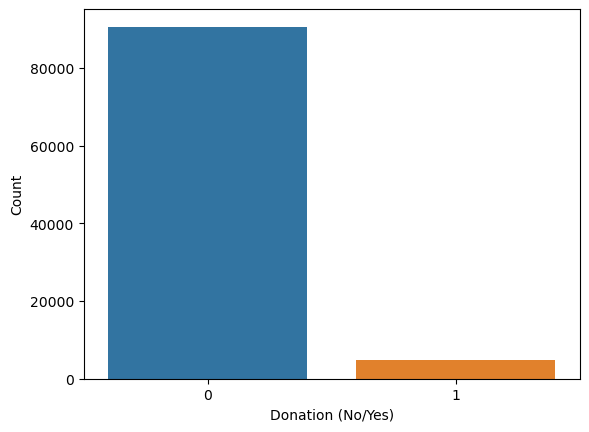

In [12]:
print(df.target_b.value_counts())

sns.countplot(df.target_b)
plt.xlabel("Donation (No/Yes)")
plt.ylabel("Count")

### Check Taget_B (The amount of donation)

We see there's huge gap between the 2 groups of donation. The donate group is about 5% of the data whereas around 95% are non-donate. 

Since we're interested in the donation group. We will take a look how much the donors spent. 
As the marketing has a cost (0.68/mail), we want to focus on the high donate group. 

In [13]:
# Get the donate group & see amount of the donation
df_donate = df[df["target_d"] > 0]
# df_donate.head()
len(df_donate)

4843

count    4843.000000
mean       15.624344
std        12.445137
min         1.000000
25%        10.000000
50%        13.000000
75%        20.000000
max       200.000000
Name: target_d, dtype: float64 



Text(0, 0.5, 'Density')

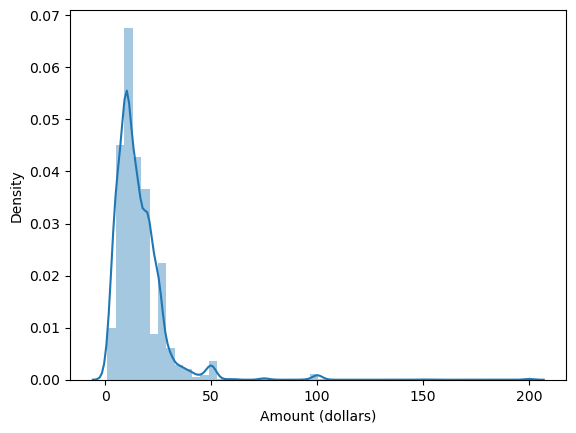

In [14]:
# Visualize donate group
sns.distplot(df_donate["target_d"])
print(df_donate["target_d"].describe(), "\n")
# print(df_donate["target_d"].value_counts())
plt.xlabel("Amount (dollars)")
plt.ylabel("Density")

- From the plot & describtive stats, we see that average amount of donation is about 15 dollars, max is 200.
- We have so small amount of donors with high amount of donation.

In [15]:
# Following lab instruction --> select categorical variable for this lab
df_cat = df.select_dtypes(object)
df_cat.head()

,osource,state,zip,noexch,mdmaud,domain,cluster,ageflag,homeownr,gender,...,rfa_21,rfa_22,rfa_23,rfa_24,rfa_2r,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,geocode2
0,GRI,IL,61081,0,XXXX,T2,36,NaN,NaN,F,...,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,0,XXXX,S1,14,E,H,M,...,N1E,N1E,NaN,F1E,L,G,X,X,X,A
2,AMH,NC,27017,0,XXXX,R2,43,NaN,U,M,...,NaN,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,0,XXXX,R2,44,E,U,F,...,A1D,A1D,NaN,NaN,L,E,X,X,X,C
4,NaN,FL,33176,0,XXXX,S2,16,E,H,F,...,A3D,I4E,A3D,A3D,L,F,X,X,X,A


### Lab instruction

Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

    - OSOURCE - symbol definitions not provided, too many categories
    - ZIP CODE - we are including state already

In [16]:
drop_list = ["osource", "zip_code"]

### Reduce the number of categories in the column GENDER.

In [17]:
# Check values in GENDER
df_cat["gender"].value_counts()

F    51277
M    39094
U     1715
J      365
C        2
A        2
Name: gender, dtype: int64

In [18]:
# Chaeck NaN
# df_cat["gender"].isna().sum()

In [19]:
# Fill NaN with "U" - Unknown
df_cat["gender"] = df_cat["gender"].fillna("U")

# df_cat["gender"].value_counts()

In [20]:
df_cat["gender"] = df_cat["gender"].apply(lambda x: "F" if x == "F" else ("M" if x == "M" else "other"))
df_cat["gender"].value_counts()

F        51277
M        39094
other     5041
Name: gender, dtype: int64

Text(0, 0.5, 'Count')

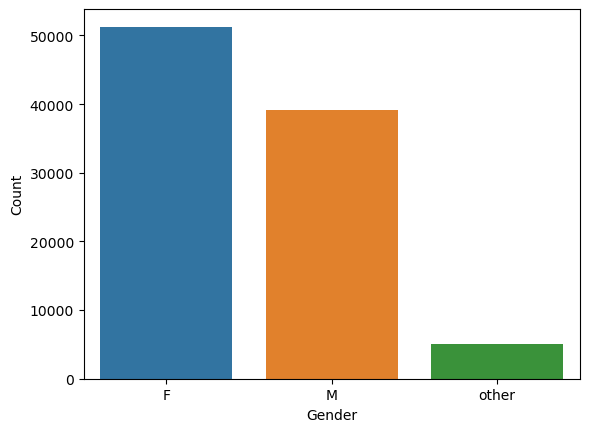

In [21]:
sns.countplot(df_cat["gender"])
plt.xlabel("Gender")
plt.ylabel("Count")